# Wyznaczanie Położenia Gwiazdy w Układzie Współrzędnych Lokalnych


Autor: **Radosław Dąbkowski**

Numer indeksu: **325683**

### Wprowadzenie
Celem tego sprawozdania jest przedstawienie wyników obliczeń dotyczących położenia danej gwiazdy na niebie, w układzie współrzędnych lokalnych (horyzontalnych), dla dwóch różnych miejsc na powierzchni Ziemi.

In [19]:
# Sfera niebieska
# Sfera niebieska
# Sfera niebieska jest to sfera o środku umieszczonym w
# środku Ziemi i o nieskończenie wielkim jednostkowym
# promieniu.
# Przecięcie sfery płaszczyzną jest kołem:
# kołem wielkim nazywamy przecięcie sfery
# płaszczyzną przechodzącą przez środek sfery
# linia prostopadła do płaszczyzny przechodząca
# przez środek sfery przecina sferę w dwóch punktach
# P i P’, które nazywamy biegunami
# kołem małym nazywamy przecięcie sfery
# płaszczyzną nie przechodzącą przez środek sfery
# Astronomia Geodezyjna z Geodynamiką – wprowadzenie do przedmiotu 3/28
# Trójkąt sferyczny
# Bokiem trójkąta sferycznego nazywamy bądź
# łuk koła wielkiego łączącego dwa wierzchołki
# trójkąta, bądź kąt środkowy, na którym oparty
# jest rozważany łuk koła wielkiego. Boki
# wyrażone są najczęściej w mierze stopniowej
# lub czasowej i oznaczone są małymi literami
# a, b, c
# Kątem trójkąta sferycznego nazywamy kąt
# płaski pomiędzy stycznymi do boków trójkąta
# w punkcie stanowiącym jego wierzchołek,
# bądź kąt dwuścienny zawarty pomiędzy
# płaszczyznami kół wielkich tworzących boki
# trójkąta. Kąty w trójkącie sferycznym
# oznaczamy wielkimi literami A, B, C.
# Rozważane będą trójkąty o bokach i kątach
# mniejszych od 180°.

# Układ współrzędnych sferycznych
# Zdefiniowanie jakiegoś przestrzennego
# układu współrzędnych wymaga
# zdefiniowania w przestrzeni
# podstawowego kierunku (oś
# biegunowa) i płaszczyzny
# podstawowej, z wyróżnionym na niej
# kierunkiem jednej z osi
# współrzędnych (półpłaszczyzna
# początkowa),
# Położenie punktów na sferze
# niebieskiej określać będą dwie
# współrzędne sferyczne.
# Astronomia Geodezyjna z Geodynamiką – wprowadzenie do przedmiotu 6/28
# Układ współrzędnych horyzontalnych
# Układ współrzędnych horyzontalnych (inaczej
# topocentrycznych/układ lokalny)
# płaszczyzną podstawową układu jest płaszczyzna
# horyzontu
# ós biegunowa: linia pionu (zenit–nadir)
# Współrzędnymi sferycznymi tego układu są:
# azymut (Az),
# wysokość (h) lub odległość zenitalna (z). Pomiędzy
# wysokością a odległością zenitalną zachodzi
# następujący związek:
# z = 90o − h
# Współrzędne horyzontalne gwiazd ulegają ciągłym
# zmianom wskutek ruchu obrotowego Ziemi i związanego
# z tym pozornego ruchu dobowego sfery niebieskiej.

# Układ współrzędnych równikowych ekwinokcjalnych
# Układ współrzędnych równikowych:
# płaszczyzną podstawową układu jest
# płaszczyzna równika ziemskiego,
# oś biegunowa: oś obrotu Ziemi (biegun
# płn–biegun płd),
# półpłaszczyzna początkowa: południk
# punktu Barana (à).
# Współrzędnymi sferycznymi tego układu są:
# rektascenzja (α),
# deklinacja (δ)
# Astronomia Geodezyjna z Geodynamiką – wprowadzenie do przedmiotu 8/28
# Układ współrzędnych równikowych ekwinokcjalnych
# Rektascenzją (α) nazywamy kąt
# dwuścienny zawarty pomiędzy
# płaszczyznami południka punktu Barana
# i południka danej gwiazdy. Rektascenzję
# liczymy dodatnio w kierunku:
# zachód–południe–wschód przeciwnie do
# ruchu wskazówek zegara
# Deklinacja (δ) nazywamy kąt zawarty
# pomiędzy płaszczyzną równika
# niebieskiego a kierunkiem do danej
# gwiazdy, mierzony w płaszczyźnie
# południka niebieskiego
# Deklinację liczymy od 0°do 90°na półkuli
# północnej i ujemnie na półkuli
# południowej.

# Punkt Barana, (à) punkt równonocy wiosennej (punkt Barana) – miejsce przecięcia
# się ekliptyki z równikiem, gdzie Słońce zmienia deklinację z ujemnej na dodatnią

# Układ współrzędnych równikowych godzinnych
# Układ współrzędnych równikowych
# godzinnych:
# płaszczyzną podstawową układu jest
# płaszczyzna równika ziemskiego
# oś biegunowa: oś obrotu Ziemi (biegun
# płn–biegun płd)
# półpłaszczyzna początkowa: południowe
# ramię południka miejscowego
# Współrzędnymi sferycznymi tego układu są:
# kąt godzinny (t),
# deklinacja (δ)
# Astronomia Geodezyjna z Geodynamiką – wprowadzenie do przedmiotu 12/28
# Układ współrzędnych równikowych godzinnych
# Kątem godzinnym (t) nazywamy kąt dwuścienny zawarty pomiędzy płaszczyznami
# południka miejscowego i południka rozpatrywanej gwiazdy. Liczony dodatnio w kierunku:
# zachód–północ–wschód, czyli zgodnie z ruchem wskazówek zegara
# Kąt godzinny jako kąt liczony od płaszczyzny południka miejscowego jest współrzędną
# lokalną, związaną z miejscem obserwacji
# Związek między kątem godzinnym a rektascenzją:
# t = α∗ + t∗
# gdzie:
# t – kąt godzinny punktu Barana,
# t∗ – kąt godzinny danej gwiazdy,
# α – rektascenzja danej gwiazdy.
# Kąt godzinny punktu Barana t nazywany jest czasem gwiazdowym

# Transformacja współrzędnych pomiędzy układem równikowym i horyzontalnym
# Zamianę współrzędnych równikowych na
# horyzontalne, przy znanej szerokości geograficznej
# φ, podają wzory podstawowe rozpisane dla boku
# GZ i kata przy zenicie w trójkącie paralaktycznym:
# sin h = sin φ sin δ + cos φ cos δ cos t
# sin z cos Az = sin δ cos φ − cos δ sin φ cos t
# sin Az = − sin t cos δ
# cos h

# Zamianę odwrotną, czyli współrzędnych
# horyzontalnych na równikowe, uzyskamy pisząc
# wzory podstawowe dla boku PnG i kąta przy
# biegunie paralaktycznym:
# sin δ = sin φ sin h + cos φ cos h cos Az
# cos δ cos t = cos φ sin h − sin φ cos h cos Az
# sin t = − sin Az cos h
# cos δ

# Transformację współrzędnych pomiędzy ukłądem
# równikowym i równikowym godzinnym realizują
# związki:
# α∗ = t − t∗
# t∗ = t − α∗
# Drugą współrzędną w obu układach jest
# deklinacja (δ)

# Ruch obrotowy Ziemi
# kąt o jaki Ziemi zrobi obrót w ciągu jednej doby
# słonecznej:
# 360o + ( 1
# 365, 2422 ) · 360o = 360o59′8”
# Doba gwiazdowa = 23h 56m 04,091s czasu
# słonecznego
# Doba słoneczna = 24h 03m 56,555s czasu
# gwiazdowego
# opóźnienie początku doby słonecznej względem
# doby gwiazdowej o 3m 56,555s czasu gwiazdowego
# na dobę, czyli 3m 55,909s czasu słonecznego
# Astronomia Geodezyjna z Geodynamiką – wprowadzenie do przedmiotu 18/28
# Czas gwiazdowy
# Podstawową jednostką skali czasu gwiazdowego jest doba gwiazdowa
# Dobą gwiazdową nazywamy okres zawarty pomiędzy dwoma kolejnymi kulminacjami górnymi
# punktu Barana. W zależności od wyboru kulminacji śblueniego lub prawdziwego punktu Barana,
# rozróżniamy śbluenią i prawdziwą dobę gwiazdowa. Początkiem doby gwiazdowej jest moment
# kulminacji górnej punktu Barana,
# Z powodu precesji punktu Barana, doba gwiazdowa jest krótsza o 0, 0084s od rzeczywistego
# pełnego obrotu Ziemi wokół osi.
# CZAS GWIAZDOWY A REKTASCENZJA
# Czas gwiazdowy jest to kąt godzinny punktu Barana:
# S = t
# Kąt godzinny punktu Barana można wyrazić wzorem:
# t = t∗ + α∗
# Dla gwiazd górujących t∗ = 0, czas gwiazdowy jest równy ich rektascenzji:
# t = α∗

# Wprowadzając czas gwiazdowy Greenwich SGr (λGr = 0) oraz czas słoneczny Greenwich T Gr
# możemy dla Warszawy napisać:
# SW −wa
# m = SGr
# m + λW −wa
# T W −wa = T Gr + λW −wa
# oraz
# SW −wa
# v = SGr
# v + λW −wa
# T W −wa
# v = T Gr
# v + λW −wa
# ogólnie zaś:
# SA = SGr + λA
# T A = T Gr + λA

# Przeliczenie pomiędzy czasem gwiazdowym a słonecznym
# T A =
# (
# (SA − λA) − SGr)
# k′ + λA
# oraz:
# SA =
# (
# T A − λA
# )
# k + SGr + λA

# 1 Przypomnienie układów współrzędnych stosowanych w
# astronomii
# 1.1 Układ współrzędnych horyzontalnych
# Układ horyzontalny definiowanyy jest przez spoziomowany instrument. Jego oś pionowa wy-
# znacza na przecięciu ze sferą niebieską dwa charakterystyczne punkty: zenit (Z) i nadir (Nd).
# Oś celowa leży w płaszczyźnie horyzontu obserwatora. W układzie horyzontalnym występują
# dwie charakterystyczne płaszczyzny, pierwsza nosi nazwę płaszczyzny południka miejscowego
# (zależy od położenia Z na sferze niebieskiej, a zatem od miejsca obserwacji) i wyznaczają ją trzy
# punkty: Zenit (Z), Północ Niebieska (PN) i środek Ziemi (O). Drugą charakterystyczną płasz-
# czyzną jest płaszczyzna horyzontu, prostopadła do osi Zenit – Nadir. W układzie tym występują
# dwie współrzędne wyznaczające jednoznacznie położenie gwiazdy na sferze niebieskiej. Są to:
# • azymut (Az): kąt dwuścienny zawarty pomiędzy półpłaszczyznami północnego ramienia
# południka miejscowego i wertykału rozpatrywanego punktu sfery niebieskiej (liczony zgod-
# nie z ruchem wskazówek zegara). Azymut mierzymy również katem płaskim w płaszczyźnie
# horyzontu, zawartym pomiędzy półpłaszczyznami północnego ramienia południka miejsco-
# wego i wertykału danej punktu sfery niebieskiej;
# • wysokość (h): liczona jako kąt między płaszczyzną horyzontu a kierunkiem do rozpatry-
# wanego punktu na sferze niebieskiej. Inną stosowaną zamiennie z wysokością współrzędną
# może być odległość zenitalna z określona jako odległość kątowa promienia gwiazdy od
# Zenitu
# z = 90◦ − h. (1)
# Linie stałych azymutów (koła wielkie przechodzące przez Zenit i Nadir) noszą nazwę wertykałów;
# koła małe równoległe do horyzontu nazywane są almukantaratami. Na płaszczyźnie horyzontu
# wyróżnia się cztery charakterystyczne punkty. Punkt północy i południa (N i S) znajduje się
# na przecięciu płaszczyzny horyzontu z płaszczyzną południka miejscowego. Punkty wschodu i
# zachodu (E i W) znajdują się na przecięciu tzw. I wertykału z płaszczyzną horyzontu, czyli na
# azymutach odpowiednio 90◦ i 270◦. Układ ten, choć bardzo wygodny do zdefiniowania, ma swoją
# istotną niedogodność: jest on zależny od pozycji obserwatora oraz czasu obserwacji, zatem nie
# nadaje się do katalogowania gwiazd.
# 1
# Rysunek 1: Układ współrzędnych horyzontalnych
# 1.2 Układ współrzędnych równikowych równonocnych (ekwinokcjalnych)
# Podstawowymi płaszczyznami w tym układzie są płaszczyzna równika niebieskiego oraz
# płaszczyzna południka miejscowego. Układ ten jest podobnie skonstruowany jak ziemski układ
# współrzędnych φ, λ. Współrzędnymi, opisującymi położenie punktu w tym układzie, są:
# • deklinacja (δ): kąt zawarty pomiędzy płaszczyzną równika niebieskiego a kierunkiem do
# danej gwiazdy, mierzony w płaszczyźnie jej południka niebieskiego. Deklinację liczymy od
# 0◦ do 90◦ na półkuli północnej i ujemnie na półkuli południowej;
# • rektascenzja (α): kąt dwuścienny zawarty pomiędzy płaszczyznami południka punktu Ba-
# rana i południka danej gwiazdy. Rektascenzję liczymy dodatnio w kierunku: zachód–
# południe–wschód (przeciwnie do ruchu wskazówek zegara). Punkt Barana (à), zwany
# inaczej punktem równonocy wiosennej, to punkt, w którym Słońce przechodzi z półkuli
# południowej na północną (punkt przecięcia się ekliptyki z równikiem). Rektascenzja często
# wyrażana jest w mierze godzinnej (h, m, s).
# Punkt równonocy wiosennej uczestniczy razem z całą sferą niebieską w ruchu dobowym sfery
# niebieskiej. Nie zmienia się zatem jego położenie wśród gwiazd, zatem i nie zmienia się wartość
# rektanscensji (oraz deklinacji).
# 1.3 Układ współrzędnych równikowych godzinnych
# Podstawowymi płaszczyznami w tym układzie są płaszczyzna równika niebieskiego oraz
# płaszczyzna południka miejscowego. Jedną ze współrzędnych jest, definiowana identycznie jak
# w poprzednim układzie, deklinacja (δ). Drugą współrzędną jest kąt godzinny t, zawarty między
# płaszczyzną południka miejscowego a południkiem danej gwiazdy. Kąt godzinny mierzy się po
# równiku począwszy od południowej części południka miejscowego PNZS w kierunku zgodnym z
# ruchem wskazówek zegara, od 0h do 24h. Zmiana tego kąta o 24h odpowiada jednemu obrotowi
# Ziemi dokoła własnej osi i stanowi jednostkę czasu zwaną dobą gwiazdową. Za pomocą kąta
# godzinnego definiowany jest również czas gwiazdowy miejscowy oznaczany jako S (od sidereal
# time). Wyraża się go prostym wzorem:
# S = α∗ + t∗ (2)
# 2
# Rysunek 2: Układ współrzędnych równikowych równonocnych (ekwinokcjalnych)
# Rysunek 3: Układ współrzędnych równikowych godzinnych
# 2 Trójkąt sferyczny
# Trójkątem sferycznym ABC nazywamy figurę utworzoną na sferze przez łuki trzech kół wiel-
# kich łączących parami 3 punkty sfery, będące trzema wierzchołkami trójkąta. Bokiem trójkąta
# sferycznego nazywamy bądź łuk koła wielkiego łączącego dwa wierzchołki trójkąta, bądź kąt
# środkowy, na którym oparty jest rozważany łuk koła wielkiego. Boki wyrażone są najczęściej
# w mierze stopniowej lub czasowej i oznaczone są małymi literami a, b, c. Kątem trójkąta
# sferycznego nazywamy kąt płaski pomiędzy stycznymi do boków trójkąta w punkcie stano-
# wiącym jego wierzchołek, bądź kąt dwuścienny zawarty pomiędzy płaszczyznami kół wielkich
# tworzących boki trójkąta. Kąty w trójkącie sferycznym oznaczamy wielkimi literami A, B,
# C (zob. Rys. 4) Rozwiązanie szczególnego przypadku trójkąta sferycznego, z wierzchołkami w
# biegunie, zenicie oraz w miejscu położenia interesującego nas ciała niebieskiego, zwanego trój-
# kątem paralaktycznym, pozwala na transformacje pomiędzy wyżej wymienionymi układami
# współrzędnych.
# 3
# Rysunek 4: Boki i kąty trójkąta paralaktycznego
# Rysunek 5: Związki w trójkącie paralaktycznym
# 3 Podstawowe związki w trójkącie sferycznym
# Wzór cosinusowy:
# cos a = cos b cos c + sin b sin c cos A
# cos b = cos a cos c + sin a sin c cos B
# cos c = cos a cos b + sin a sin b cos C
# (3)
# Wzór sinusowo – cosinusowy:
# sin a cos B = cos b sin c − sin b cos c cos A
# sin b cos C = cos c sin a − sin c cos a cos B
# sin c cos A = cos a sin b − sin a cos b cos C
# (4)
# Wzór sinusowy: sin a
# sin A = sin b
# sin B = sin c
# sin C (5)
# 3.1 Przydatne przekształcenia w trójkącie paralaktycznym
# Spróbujemy wyrazić związek pomiędzy układem współrzędnych horyzontalnych a układem
# współrzędnych równikowych godzinnych, aby móc obliczyć wartości h oraz Az.
# 4
# Najpierw skorzystamy z równania 3 :
# cos(90 − h) = cos(90◦ − φ) cos(90◦ − δ) + sin(90◦ − φ) sin(90◦ − δ) cos t, (6)
# które po przekształceniach daje nam wzór na wartość h:
# sin h = sin φ sin δ + cos φ cos δ cos t. (7)
# Z równania 4 na wzór sinusowo – cosinusowy mamy:
# sin(90 − h) cos(360◦ − Az) = cos(90◦ − δ) sin(90◦ − φ) − sin(90◦ − δ) cos(90◦ − φ) cos t, (8)
# co po uporządkowaniu daje nam
# cos h cos Az = sin δ cos φ − cos δ sin φ cos t. (9)
# Z równania (9) można wyznaczyć szukaną wartość azymutu. Trzeba jednak wtedy pamiętać,
# że wartość azymutu mieści się pomiędzy 0◦ a 360◦, a funkcja cosinus nie jest w tym przedziale
# różnowartościowa. Należy wówczas skorzystać z warunku, że jeśli t mniejsze od 180◦ to aby
# otrzymać szukany azymut, musimy odjąć obliczoną wartość od 360◦. Aby tego uniknąć, możemy
# zapisać wzór na azymut, wykorzystując dodatkowo wzór sinusowy 5:
# sin(90◦ − δ)
# sin(360◦ − Az) = sin z
# sin t (10)
# a po uporządkowaniu:
# cos h sin Az = − cos δ sin t (11)
# Dzieląc stronami równanie 11 przez równanie 9 otrzymujemy wzór na obliczenie Az, który
# jednoznacznie rozwiązać możemy, korzystając z obecnej w językach programowania, dwuargu-
# mentowej funkcji ‘arcus tangens 2’:
# tg Az = − cos δ sin t
# cos φ sin δ − sin φ cos δ cos t (12)
# 5
# 4 Zadanie 1. Transformacja współrzędnych gwiazdy z układu
# równikowego do horyzontalnego
# Treść zadania
# Wyznaczyć położenie danej gwiazdy, w układzie współrzędnych lokalnych (horyzontalnych),
# dla dwóch miejsc na powierzchni Ziemi. Obliczenia mają zostać wykonane dla całej doby, 1 lipca
# 2023, w godzinnych interwałach. Położenie gwiazdy należy zwizualizować na wykresach, np.
# wykresie typu skyplot, wykres 3D sfery niebieskiej, wykres liniowy zależności wysokości (i/lub
# azymutu) od czasu, lub wykres "panorama".
# 4.1 Dane do zadania
# Danymi do zadania są współrzędne gwiazdy (tab. 1), w układzie równikowym ekwinokcjal-
# nym, na epokę 2023.5 (czyli 1 lipca 2023). Obliczenia należy wykonać, poczynając od danego
# czasu urzędowego dla Polski (UTC+2).
# Zadanie proszę wykonać dla całej doby 1 lipca 2023, dla dwóch położeń obserwatora:
# • okolice Warszawy: φ = 52◦; λ = 21◦
# • równik, dla tej samej długości geograficznej: φ = 0◦; λ = 21◦
# Podane gwiazdy są to jedne z najbardziej charakterystycznych gwiazd, widocznych na półkuli
# północnej (kilka najjaśniejszych gwiazd na niebie oraz gwiazdy wchodzące w skład gwiazdozbio-
# rów Wielkiego Wozu oraz Kasjopei):
# Tabela 1: Dane do zadania
# nr Nr gwiazdy z RA
# FK5
# α δ
# h m s ◦ m s
# 1 699 18 37 44.096 38 48 24.290
# 2 48 1 27 22.471 60 21 23.520
# 3 295 7 46 45.037 27 58 2.980
# 4 168 4 37 16.316 16 33 16.570
# 5 497 13 24 52.075 54 48 11.500
# 6 17 0 38 17.664 54 1 33.360
# 7 21 0 41 51.378 56 39 37.440
# 8 416 11 3 14.669 56 15 21.180
# 9 257 6 46 10.978 -16 44 59.530
# 10 417 11 5 9.530 61 37 24.440
# 11 483 12 55 3.395 55 49 57.620
# 12 224 5 56 26.696 7 24 34.170
# 13 32 0 58 8.795 60 50 36.350
# 14 291 7 40 31.848 5 9 47.150
# 15 899 23 55 34.219 57 37 48.710
# 16 2 0 10 26.825 59 16 45.480
# 17 526 14 16 44.039 19 3 39.490
# 18 509 13 48 27.861 49 11 48.040
# 19 63 1 56 6.746 63 47 4.470
# 20 447 11 55 3.388 53 33 50.550
# 21 456 12 16 34.755 56 54 7.800
# 22 193 5 18 25.758 46 1 9.640
# 23 194 5 15 40.103 -8 10 34.330
# 6
# 4.2 Kolejność wykonywania zadania
# 1. Uwzględnienie strefy czasowej Warszawy i obliczenie czasu UTC (w naszym przypadku,
# ignorujemy różnicę pomiędzy czasem UTC i UT1, nie uwzględniamy odpowiedniej po-
# prawki, dlatego obliczony przez nas czas UTC będzie równy czasowi UT1) – strefę cza-
# sową dla Polski (UTC+2) można uwzględnić na samym początku obliczeń: wówczas wy-
# niki otrzymamy dla całej doby 1 lipca, od godziny 0 do 24 w czasie UTC+2; lub możemy
# uwzględnić strefę czasową na samym końcu obliczeń, podczas etykietowania wartości na
# wykresach: wówczas otrzymamy wyniki dla doby 1 lipca, ale czasu UTC, czyli od 200
# (UTC+2) dnia 1 lipca do 200 (UTC+2) 2 lipca. Oba rozwiązania będą poprawne,
# 2. Obliczamy lokalny czas gwiazdowy (LST). Możemy to zrobić na dwa sposoby:
# 2.1. obliczamy czas śblueni gwiazdowy Greenwich, na epokę 0 UT1 (GMST0), na podstawie
# daty juliańskiej danej epoki na godzinę 0 (kod do obliczeń daty juliańskiej znajduje
# się w materiałach),
# 2.2. konkretną epokę obliczamy poprzez dodanie do GMST0 interesującej nas godziny,
# pomnożonej przez wartość 1.002737909 350795 (zamiana jednostek z godzin słonecz-
# nych, na gwiazdowe)
# 2.3. obliczamy LST uwzględniając długość geograficzna miejsca obserwacji.
# lub
# 2.1. obliczamy czas śblueni gwiazdowy Greenwich (GMST), na dowolną epokę danego dnia,
# na podstawie daty juliańskiej obliczonej dla konkretnej godziny,
# 2.2. obliczamy LST uwzględniając długość geograficzna miejsca obserwacji;
# 3. Obliczenie kąta godzinnego, znając lokalny czas gwiazdowy oraz rektascenzję gwiazdy
# (równanie 2);
# 4. Rozwiązanie trójkąta sferycznego i obliczenie wysokości oraz azymutu gwiazdy (wykonanie
# transformacji współrzędnych równikowych do współrzędnych horyzontalnych)
# 5. Wykonanie odpowiednich wizualizacji.
# 4.3 Ocena ćwiczenia
# Na ocenę ćwiczenia wpływ mają:
# • jakość sprawozdania, w którym opisane powinny zostać kolejne kroki wykonywanego ćwi-
# czenia,
# • jakość i różnorodność wykonanych wizualizacji,
# • wnioski wyciągnięte na podstawie wykonanych rysunków. Komentarz: czy dana gwiazda
# wschodzi i zachodzi, przechodzi przez I wertykał, czy elonguje,
# • na wyższą ocenę, dobrym pomysłem jest wykonanie podobnych obliczeń np. dla Słońca,
# którego współrzędne równikowe, dla odpowiedniej daty, odczytać można w Roczniku Astro-
# nomicznym (str. 13-20),
# • dla ambitnych, wizualizację można wykonać np. dla wszystkich gwiazd Wielkiego Wozu
# lub Kasjopei na jednym wykresie (pokazując ruch dobowy całego gwiazdozbioru). Dla
# Wielkiego Wozu są to gwiazdy o identyfikatorach FK5: 416, 417, 447, 456, 483, 497, 509;
# dla Kasjopei: 2, 17, 21, 32, 48, 63, 899.
# UWAGA! Na pierwszej stronie ćwiczenia proszę podać swój numer oraz dane do
# wykonania zadania.
# 7
# 5 Przydatne funkcje oraz fragmenty kodu
# 5.1 Data juliańska
# Liczba dni juliańskich (Julian Day), zwana później JD jest ciągłym zliczaniem dni i ich
# części od początku roku -4712. Zgodnie z tradycją, JD rozpoczyna się w południe śblueniego
# czasu Greenwich, czyli o godzinie 12h czasu uniwersalnego U T . Zastosowanie JD w obliczeniach
# astronomicznych pozwala na kilka rzeczy:
# 1. uniknięcie problemu przy zmianie kalendarza z juliańskiego na gregoriański – przejście z 4
# października 1582 na 15 października 1582,
# 2. możliwość dokładnego obliczania odstępu w czasie od wydarzeń, które miały miejsce dawno
# w przeszłości, na przykład od zaćmienia Słońca 28 sierpnia -1203 roku,
# 3. zachowanie podzielności przez 4 przy obliczaniu lat przestępnych, ponieważ w mierze astro-
# nomicznej dla lat przed rokiem 1, wystąpił rok 0 oraz rok -1.
# Poniżej zaprezentowano algorytm napisany w oprogramowaniu Python służący do obliczenia
# JD (Uwaga! Jest to uproszczona wersja algorytmu, pozwalajaca na wykonanie odpowiednich
# przeliczeń tylko w przedziale od 1 Marca 1900 do 28 lutego 2100!).
# Kod 1: Data Juliańska
# 1 def julday(y,m,d,h):
# 2 ’’’
# 3 Simplified Julian Date generator, valid only between
# 4 1 March 1900 to 28 February 2100
# 5 ’’’
# 6 if m <= 2:
# 7 y = y - 1
# 8 m = m + 12
# 9
# 10 jd = np.floor(365.25*(y+4716))+np.floor(30.6001*(m+1))+d+h/24-1537.5
# 11 return jd
# 5.2 Obliczenie GMST
# Kod 2: GMST
# 1 def GMST(jd):
# 2 ’’’
# 3 calculation of Greenwich Mean Sidereal Time - GMST in hours
# 4 ----------
# 5 jd : TYPE
# 6 julian date
# 7 ’’’
# 8 T = (jd - 2451545) / 36525
# 9 Tu = jd - 2451545
# 10 GMST = 280.46061837 + 360.98564736629*(jd - 2451545.0) + 0.000387933*T**2-T ↰ **3/38710000
# 11 GMST = (g%360) / 15 #GMST in hours
# 12 return g
# 8
# 5.3 Wykres 3D oraz parametryzacja kuli:
# Kod 3: plot 3D
# 1 import matplotlib.pyplot as plt
# 2 fig = plt.figure(figsize = (10,10))
# 3 ax = fig.add_subplot(projection = ’3d’)
# 4 # promie´n Ziemi
# 5 r = 1
# 6 # siatka wspołrz˛ednych
# 7 u, v = np.mgrid[0:(2 * np.pi+0.1):0.1, 0:np.pi:0.1]
# 8 x = np.cos(u) * np.sin(v)
# 9 y = np.sin(u) * np.sin(v)
# 10 z = np.cos(v)
# 11 z[z<0] = 0 # bez tego, narysowaliby´smy cał ˛a kul˛e, a chcemy tylko półkul˛e
# 12 ax.plot_surface(x,y,z, alpha = 0.1)
# 13
# 14
# 15 # narysowanie punktu na sferze
# 16 gx = r * np.sin(Az) * np.cos(h)
# 17 gy = r * np.cos(Az) * np.cos(h)
# 18 gz = r * np.sin(h)
# 19 ax.plot3D(gx,gy,gz)
# 5.4 Wykres ’skyplot’
# Kod 4: Skyplot
# 1 fig = plt.figure(figsize = (8,8))
# 2 ax = fig.add_subplot(polar = True)
# 3 ax.set_theta_zero_location(’N’) # ustawienie kierunku północy na górze wykresu
# 4 ax.set_theta_direction(-1)
# 5
# 6 ax.set_yticks(range(0, 90+10, 10)) # Define the yticks
# 7
# 8 yLabel = [’90’, ’’, ’’, ’60’, ’’, ’’, ’30’, ’’, ’’, ’’]
# 9 ax.set_yticklabels(yLabel)
# 10 ax.set_rlim(0,90)
# 11
# 12 # narysowanie punktu na wykresie
# 13 ax.scatter(Az, 90-np.rad2deg(h))
# Przydatnym rozwiązaniem, umożliwiającym wykonanie prostej wizualizacji, jest ustawienie
# interwału rysowania kolejnych punktów, dzięki funkcji: plt.pause(1), gdzie ’1’ jest wartością
# opóźnienia rysowania kolejnych elementów, podaną w sekundach.
# 9

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def dms2deg(dms):
    d = dms[0]
    m = dms[1]
    s = dms[2]
    
    deg = d+m/60+s/3600
    return deg

def deg2dms(dd):
    deg = int(np.trunc(dd))
    mnt = int(np.trunc((dd-deg) * 60))
    sec = ((dd-deg) * 60 - mnt) * 60
    dms = [deg, abs(mnt), abs(sec)]
    # print(str(deg)+chr(176)+"%0.2d" % abs(mnt)+'\''+"%08.5f" % abs(secq)+'\"')
    return dms

def hms2rad(dms):
    d = dms[0]
    m = dms[1]
    s = dms[2]
    
    deg = d+m/60+s/3600
    rad = np.deg2rad(deg*15)
    return rad

def dms2rad(dms):
    d = dms[0]
    m = dms[1]
    s = dms[2]
    
    deg = d+m/60+s/3600
    rad = np.deg2rad(deg)
    return rad

def hms2sec(hms):
    sec = hms[0]*3600 + hms[1] * 60 + hms[2]
    return sec

def sec2hms(s):
    hd = s/3600
    h = int(np.trunc(hd))
    m = int(np.trunc((hd-h) * 60))
    s = ((hd-h) * 60 - m) * 60
    hms = [h,abs(m),abs(s)]
    return hms

def rad2hms(rad):
    dd = np.rad2deg(rad)
    dd = dd/15
    deg = int(np.trunc(dd))
    mnt = int(np.trunc((dd-deg) * 60))
    sec = ((dd-deg) * 60 - mnt) * 60
    dms = [deg, abs(mnt), abs(sec)]
    return dms

def rad2dms(rad):
    dd = np.rad2deg(rad)
    dd = dd
    deg = int(np.trunc(dd))
    mnt = int(np.trunc((dd-deg) * 60))
    sec = ((dd-deg) * 60 - mnt) * 60
    dms = [deg, abs(mnt), abs(sec)]
    return dms

def dms2hms(dms):
    sall = dms[0] * (4*60) + dms[1] * 4 + dms[2]/15    
    h = int(sall//3600)
    m = int((sall%3600)//60)
    s = sall%60
    return [h,m,s] 

def julday(y,m,d,h):
    '''
    Simplified Julian Date generator, valid only between
    1 March 1900 to 28 February 2100
    '''
    if m <= 2:
        y = y - 1
        m = m + 12
    # A = np.trunc(y/100)
    # B = 2-A+np.trunc(A/4)
    # C = np.trunc(365.25*y)
    # D = np.trunc(30.6001 * (m+1))
    # jd = B + C + D + d + 1720994.5
    jd = np.floor(365.25*(y+4716))+np.floor(30.6001*(m+1))+d+h/24-1537.5;
    return jd

def GMST(jd):
    '''
    calculation of Greenwich Mean Sidereal Time - GMST in hours
    ----------
    jd : TYPE
        julian date
    '''
    T = (jd - 2451545) / 36525
    Tu = jd - 2451545
    g = 280.46061837 + 360.98564736629*(jd - 2451545.0) + 0.000387933*T**2-T**3/38710000
    g = (g%360) / 15
    return g

### Metodologia

Aby wyznaczyć położenie gwiazdy RA FK5 699 w układzie współrzędnych lokalnych dla dwóch różnych miejsc na Ziemi, zastosowano następujące kroki:

1. Wybrano dwie lokalizacje na Ziemi, dla których obliczenia miały zostać wykonane. W tym sprawozdaniu wybrano lokalizacje:
    Lokalizacja A: Szerokość geograficzna 52°N, Długość geograficzna 21°W (Warszawa).
    Lokalizacja B: Szerokość geograficzna 0°N, Długość geograficzna 21°E (Równik).
2. Dla każdej z tych lokalizacji oraz wybranej gwiazdy obliczono współrzędne horyzontalne (azymut i wysokość) w godzinnych interwałach w ciągu doby, 1 lipca 2023 roku.

### Obliczenia

Współrzędne gwiazdy RA FK5 699 w układzie równikowym ekwinokcjalnym na epokę 2023.5 wynoszą:


In [21]:
RA = [18, 37, 44.096]
DEC = [38, 48, 24.290]

In [22]:
from astroplan import Observer
from astropy.time import Time
from astropy.coordinates import SkyCoord
import astropy.units as u

warsaw_lat = 52.2297
warsaw_lon = 21.0122
equator_lat = 0
equator_lon = 21.0122

warsaw = []
equator = []

RA = hms2rad(RA)
DEC = dms2rad(DEC)

# Define the observer's location
warsaw_obs = Observer(latitude=warsaw_lat*u.deg, longitude=warsaw_lon*u.deg, elevation=0*u.m)
equator_obs = Observer(latitude=equator_lat*u.deg, longitude=equator_lon*u.deg, elevation=0*u.m)

# Define the celestial body's coordinates
celestial_body = SkyCoord(RA, DEC, unit=(u.hourangle, u.deg))

for i in range(0, 24):
    # Define the time
    time = Time("2023-07-01 00:00:00") + i*u.hour

    # Calculate the Azimuth and Altitude
    az, alt = warsaw_obs.altaz(time, celestial_body).az, warsaw_obs.altaz(time, celestial_body).alt

    # conver to radians
    az = az.to(u.rad)
    alt = alt.to(u.rad)

    warsaw.append([az.value, alt.value])

    # Calculate the Azimuth and Altitude
    az, alt = equator_obs.altaz(time, celestial_body).az, equator_obs.altaz(time, celestial_body).alt

    # conver to radians
    az = az.to(u.rad)
    alt = alt.to(u.rad)

    equator.append([az.value, alt.value])

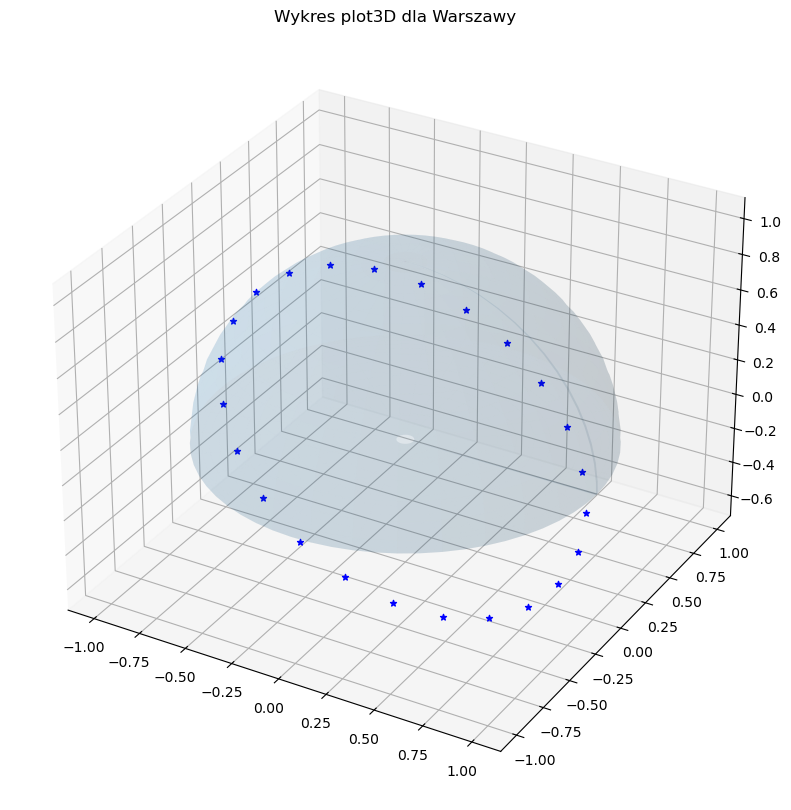

In [23]:
# wykres plot3D dla Warszawy
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
ax.title.set_text('Wykres plot3D dla Warszawy')
# promień Ziemi
r = 1
# siatka wspołrzędnych
u, v = np.mgrid[0:(2 * np.pi+0.1):0.1, 0:np.pi:0.1]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
z[z<0] = 0		# bez tego, narysowalibyśmy całą kulę, a chcemy tylko półkulę
ax.plot_surface(x,y,z, alpha = 0.1)

for Az, h in warsaw:
    x = r*np.cos(Az)*np.cos(h)
    y = r*np.sin(Az)*np.cos(h)
    z = r*np.sin(h)
    ax.scatter(x,y,z, color = 'blue', marker = "*")

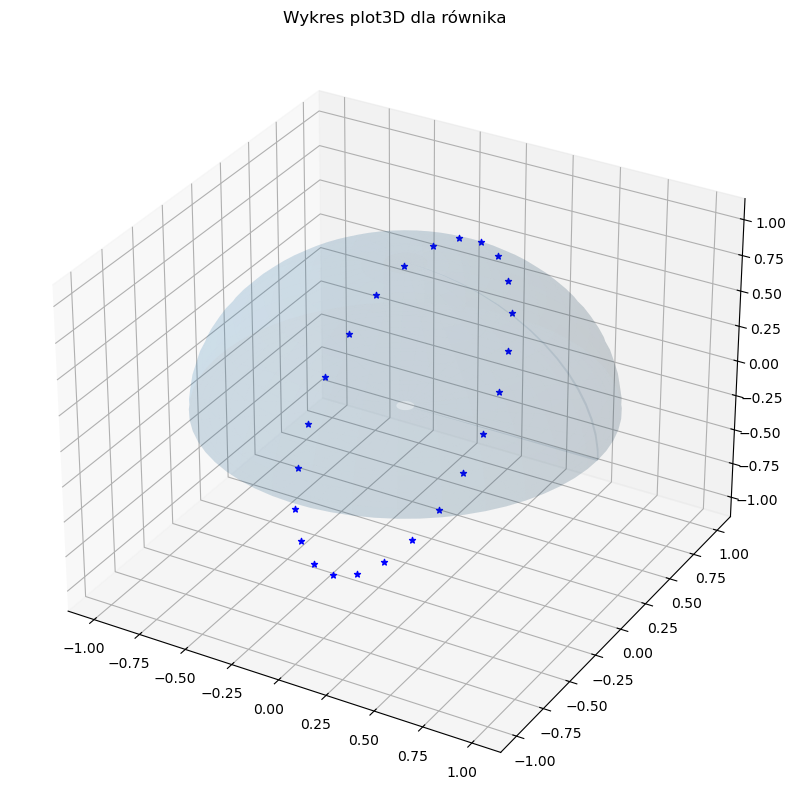

In [24]:
# wykres plot3D dla równika
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
# set title
ax.set_title("Wykres plot3D dla równika")
# promień Ziemi
r = 1
# siatka wspołrzędnych
u, v = np.mgrid[0:(2 * np.pi+0.1):0.1, 0:np.pi:0.1]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
z[z<0] = 0		# bez tego, narysowalibyśmy całą kulę, a chcemy tylko półkulę
ax.plot_surface(x,y,z, alpha = 0.1)

for Az, h in equator:
    x = r*np.cos(Az)*np.cos(h)
    y = r*np.sin(Az)*np.cos(h)
    z = r*np.sin(h)
    ax.scatter(x,y,z, color = 'blue', marker="*")

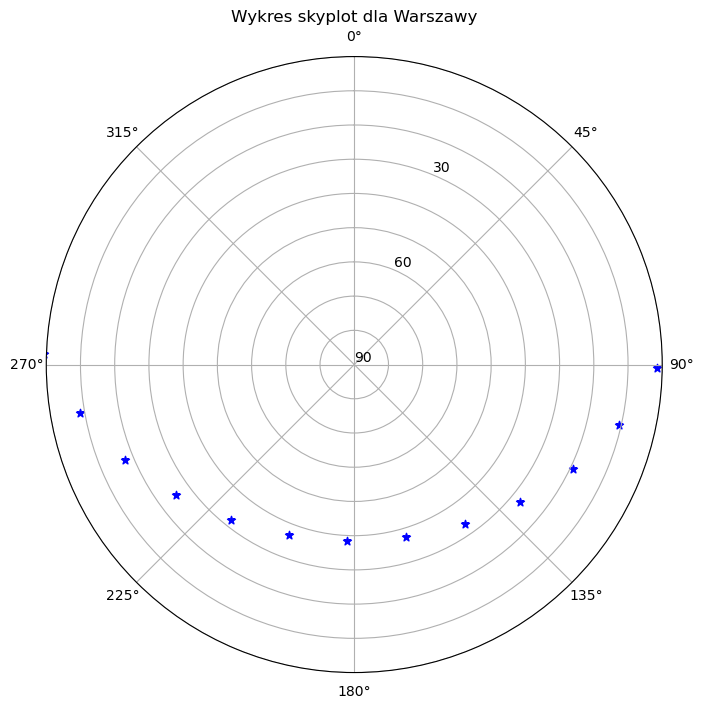

In [25]:
# wykres skyplot dla Warszawy
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(polar = True)
ax.title.set_text('Wykres skyplot dla Warszawy')
ax.set_theta_zero_location('N') # ustawienie kierunku północy na górze wykresu
ax.set_theta_direction(-1)

ax.set_yticks(range(0, 90+10, 10)) # Define the yticks

yLabel = ['90', '', '', '60', '', '', '30', '', '', '']
ax.set_yticklabels(yLabel)
ax.set_rlim(0,90)

for Az, h in warsaw:
    ax.scatter(Az, 90-np.rad2deg(h), color = 'blue', marker ="*")


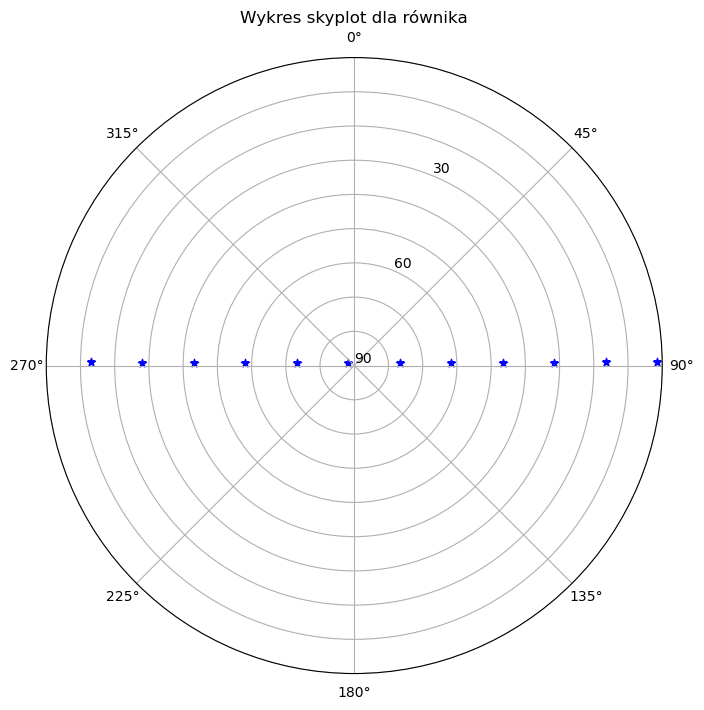

In [26]:
# wykres skyplot dla równika
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(polar = True)
ax.title.set_text('Wykres skyplot dla równika')
ax.set_theta_zero_location('N') # ustawienie kierunku północy na górze wykresu
ax.set_theta_direction(-1)

ax.set_yticks(range(0, 90+10, 10)) # Define the yticks

yLabel = ['90', '', '', '60', '', '', '30', '', '', '']
ax.set_yticklabels(yLabel)
ax.set_rlim(0,90)

for Az, h in equator:
    ax.scatter(Az, 90-np.rad2deg(h), color = 'blue', marker ="*")

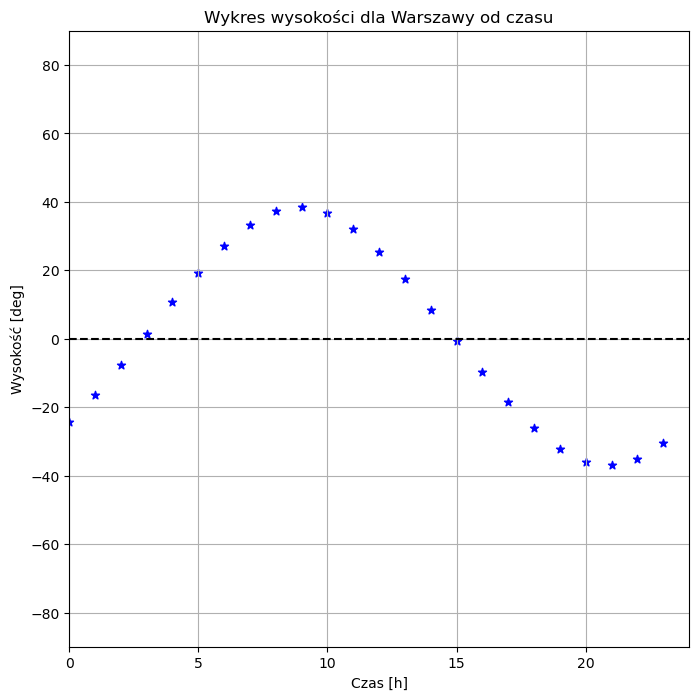

In [27]:
# wykres wysokości dla Warszawy od czasu
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()
ax.title.set_text('Wykres wysokości dla Warszawy od czasu')
ax.set_xlabel('Czas [h]')
ax.set_ylabel('Wysokość [deg]')
ax.set_ylim(-90,90)
ax.set_xlim(0,24)
# ustaw przerywaną linię poziomą na wysokości 0
ax.axhline(0, linestyle = '--', color = 'black')
# ustaw siatkę
ax.grid()

for i in range(0, 24):
    ax.scatter(i, np.rad2deg(warsaw[i][1]), color = 'blue', marker ="*")

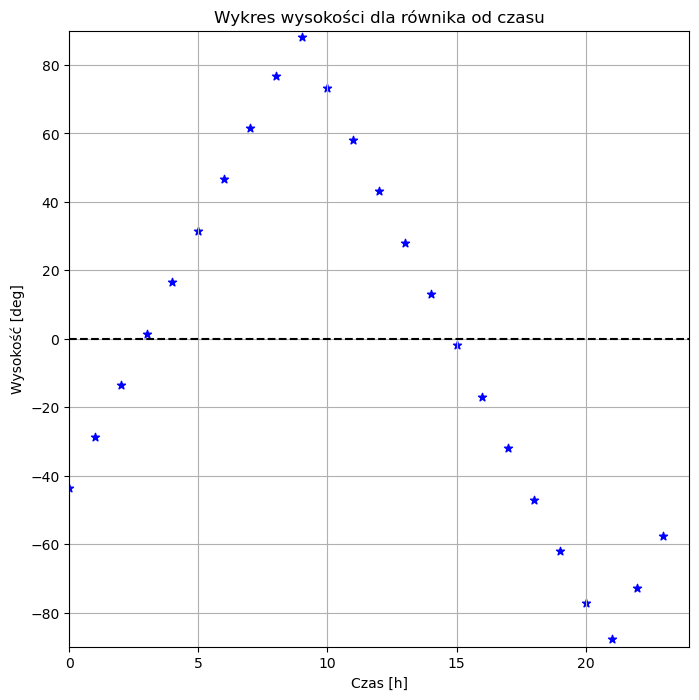

In [28]:
# wykres wysokości dla równika od czasu
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()
ax.title.set_text('Wykres wysokości dla równika od czasu')
ax.set_xlabel('Czas [h]')
ax.set_ylabel('Wysokość [deg]')
ax.set_ylim(-90,90)
ax.set_xlim(0,24)
# ustaw przerywaną linię poziomą na wysokości 0
ax.axhline(0, linestyle = '--', color = 'black')
# ustaw siatkę
ax.grid()

for i in range(0, 24):
    ax.scatter(i, np.rad2deg(equator[i][1]), color = 'blue', marker ="*")